# Machine Learning Project : Classification
## Predicting Customer Churn of Telco Industry

### In this project, I will use different model to predict which model is the best to predict the dataset.

<blockquote>In this project i will use the dataset from kaggle, here's the link: https://www.kaggle.com/blastchar/telco-customer-churn

<b>The purpose of this project are:</b>
<ol>
    <li>Predict which Customer likely to churn</li>
    <li>Which Features correlate with the churn</li>


## In this project we will use GridSearchCV and Pipeline to find best Parameter
<ol>
    <li>C</li>
    <li>Kernel</li>
    <li>max_depth</li>
    <li>n_estimators</li>
    <li>Other</li>
</ol>

## And testing some model:
<ol>
    <li>Logistic Regression</li>
    <li>Support Vector Machine</li>
    <li>Decision Tree</li>
    <li>KNearest Neighbors</li>
    <li>Bagging Classifier</li>
    <li>Random Forest Classifier</li>
    <li>Extra Tree Classifier</li>
    <li>Gradient Boosting Classifier</li>
</ol>

## This project will use simple parameter and hyperparameter

As I need higher spec to run faster, I only use simple parameter and hyperparameter



### Now I will import the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Lets see the data and the attribute of the feature

In [75]:
pd.set_option('display.max_columns',None)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.shape

(7043, 21)

<b> In this dataset we have 21 columns and 7043 rows

## Exploratory Data Analysis

In [76]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In this dataset all features are in object dtypes, so we need to change some features type later, lets try to check the describe information

In [77]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


At MonthlyCharges columns we saw that the mean and median has different number but not too much, so we can expect that there is no outlier in our data. Lets check it with boxplot

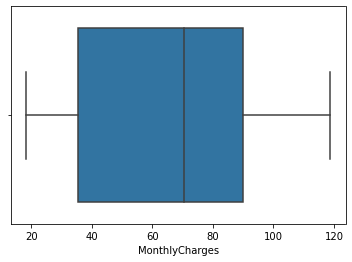

In [78]:
import seaborn as sns
sns.boxplot(data.MonthlyCharges)

In the MonthlyCharges there is no outlier as we expected

In [79]:
# Lets look at Object Describe
data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,8015-IHCGW,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In this table we can see the count, unique, top and freq. For example the gender we have 'Male' as top value, but as we see the freq, its 3555 which is ~50% of the total data. We can look more with count_values

In [80]:
data.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [18]:
# Or using Normalize to get the percentage
data.gender.value_counts(normalize=True)

Male      0.504756
Female    0.495244
Name: gender, dtype: float64

### As We see it with describe include object we can visualize the data percetage ot the object data

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The TotalCharges columns is in object type, lets change it to float

### Data info give us the information of the feature
Fot this dataset we dont have null value so we dont need to process the null value. In real dataset, this is a rare case

## Lets Process our data

In [207]:
df['TotalCharges']=df['TotalCharges'].astype(float)

ValueError: could not convert string to float: ''

## Im trying to change to float but it gives me error, using lambda x: x.strip() still error, so lets try to find the row that give me error using try except method

In [262]:
df=data.copy()
count=0
try:
    df2=df['TotalCharges']
    for x in df2:
        x=float(x)+1
        count+=1
except:
    print('failed',count)
        

failed 488


In [265]:
df['TotalCharges']=df['TotalCharges'].apply(lambda x: x.replace(' ','0'))
df['TotalCharges']=df['TotalCharges'].astype(float)

## So its a null value, I check before and its not null value but actually its a space value, because its only one, lets drop the row

## Lets check the detail of features

In [266]:
#df=data.copy()
df=df.drop(columns='customerID',axis=1)
df_unique=df.nunique()
df_unique

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

## Now lets try to category the features and process it

In [267]:
binary_column=list(df_unique[df_unique==2].index)
binary_column

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [268]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
for column in binary_column:
    df[column]=lb.fit_transform(df[column])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


# 0 is No Churn, and 1 is Yes Churn

In [269]:
cat_column=[]
for x in df_unique.index:
    if x not in binary_column and x not in ['MonthlyCharges','TotalCharges']:
        cat_column.append(x)
cat_column

['tenure',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [270]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in cat_column:
    df[column]=le.fit_transform(df[column])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Now we have numerical value in all features, lets explore some data

D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.war

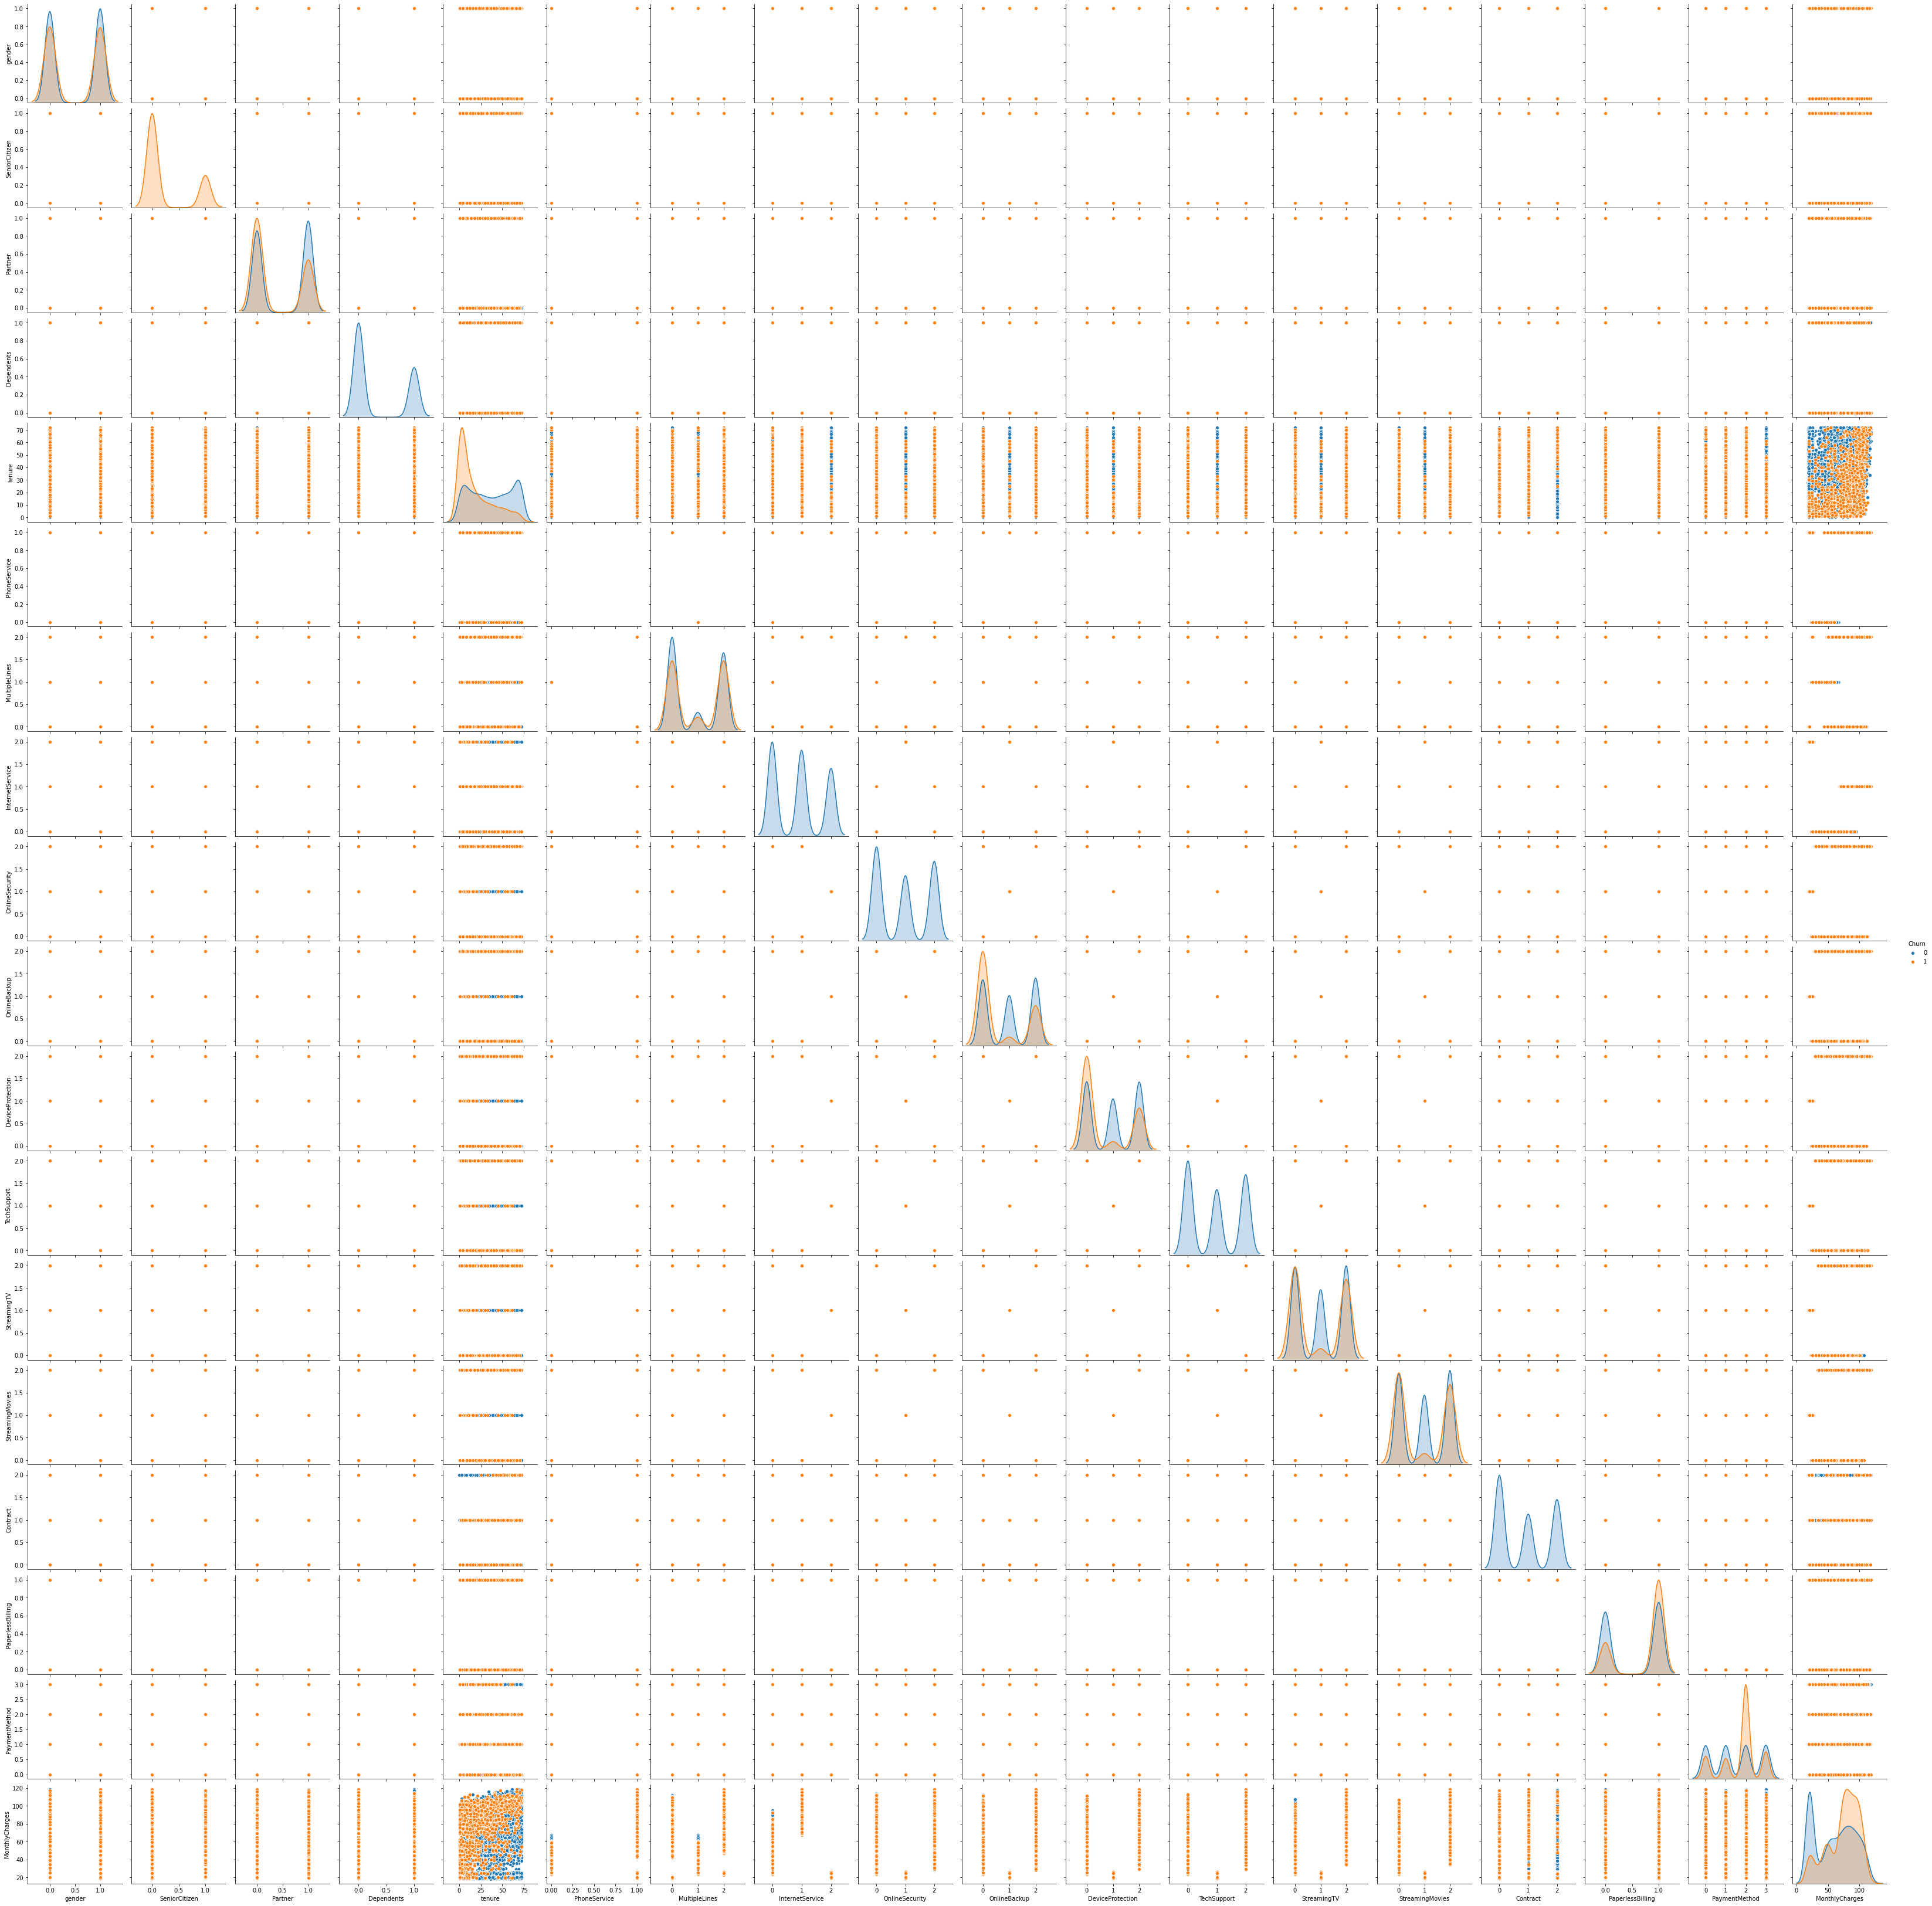

In [157]:
sns.pairplot(df,hue='Churn')

If we look at the pairplot theres no correlation between features, lets check again using other method

In [271]:
column=list(df.drop(columns='Churn',axis=1).columns)
correlation=df[column].corrwith(df['Churn'])
correlation.sort_values()
correlation

gender             -0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.038037
InternetService    -0.047291
OnlineSecurity     -0.289309
OnlineBackup       -0.195525
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.396713
PaperlessBilling    0.191825
PaymentMethod       0.107062
MonthlyCharges      0.193356
TotalCharges       -0.198324
dtype: float64

[(-1.0, 1.0), Text(0, 0.5, 'Correlation')]

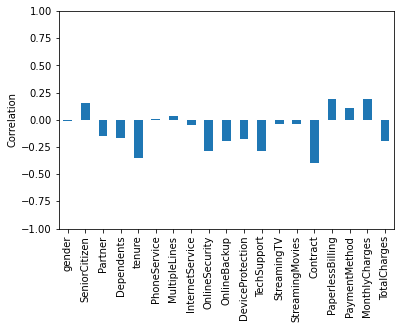

In [272]:
ax=correlation.plot(kind='bar')
ax.set(ylim=[-1,1],ylabel='Correlation')

From the graph we can know that there are weak correlation in churn with features tenue and contract

# Lets try using Machine Learning to Predict and Interpret the Data

# Logistic Regression

### Train Test Split the Data

In [280]:
from sklearn.model_selection import StratifiedShuffleSplit
feature_column=df.columns[:-1]
SSSplit=StratifiedShuffleSplit(test_size=0.2,random_state=1)
train_idx,test_idx=next(SSSplit.split(df[feature_column],df.Churn))
x_train=df.loc[train_idx,feature_column]
x_test=df.loc[test_idx,feature_column]
y_train=df.loc[train_idx,'Churn']
y_test=df.loc[test_idx,'Churn']


Lets run it

In [276]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
pipe = Pipeline(steps=[
    ('S', StandardScaler()), 
    ('LR', LogisticRegression())])
param_grid = {
    'LR__penalty': [None,'l1','l2'],
    'LR__C': [0.001,0.01,0.1,1],
    'LR__solver':['liblinear']
}
LR_GC=GridSearchCV(pipe,param_grid,n_jobs=-1)
LR_GC=LR_GC.fit(x_train,y_train)


In [281]:
LR_GC.best_estimator_

Pipeline(steps=[('S', StandardScaler()),
                ('LR', LogisticRegression(C=0.1, solver='liblinear'))])

With GridSearchCV we can know which parameter is the best from the selection

In [279]:
yhat_LR=LR_GC.predict(x_test)

In [285]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
def scores(x,y=y_test):
    print('Accuracy',accuracy_score(y_test,x))
    print('Precision',precision_score(y_test,x))
    print('F1',f1_score(y_test,x))
    print('ROC_AUC',roc_auc_score(y_test,x))
    

In [286]:
scores(yhat_LR)

Accuracy 0.8026969481902059
Precision 0.6568627450980392
F1 0.5911764705882353
ROC_AUC 0.7179919398589476


## With Logistic Regression I got 80.2% Accuracy Score using C=0.1

# KNearestNeighbors

In [288]:
from sklearn.neighbors import KNeighborsClassifier


In [291]:
pipe = Pipeline(steps=[
    ('S', StandardScaler()), 
    ('KNN', KNeighborsClassifier())])
param_grid = {
    'KNN__n_neighbors': list(range(0,101,5)),
    'KNN__weights': ['uniform', 'distance'],
}
KNN_GC=GridSearchCV(pipe,param_grid,n_jobs=-1)
KNN_GC=KNN_GC.fit(x_train,y_train)

In [292]:
KNN_GC.best_estimator_

Pipeline(steps=[('S', StandardScaler()),
                ('KNN', KNeighborsClassifier(n_neighbors=65))])

In [293]:
yhat_KNN=KNN_GC.predict(x_test)

In [294]:
scores(yhat_KNN)

Accuracy 0.7856635911994322
Precision 0.6052631578947368
F1 0.5782122905027933
ROC_AUC 0.7115205766100907


## With KNearestNeighbord I got 78.56% Accuracy Score using n_neighbors=65

# SVM (LinearSVC)

In [295]:
from sklearn.svm import LinearSVC

In [299]:
pipe = Pipeline(steps=[
    ('S', StandardScaler()), 
    ('LinSVC', LinearSVC())])
param_grid = {
    'LinSVC__penalty': ['l1','l2'],
    'LinSVC__C': [0.001,0.01,0.1,1,10],
}
LinSVC_GC=GridSearchCV(pipe,param_grid,n_jobs=-1)
LinSVC_GC=LinSVC_GC.fit(x_train,y_train)

In [306]:
yhat_linearSVC=LinSVC_GC.predict(x_test)

In [308]:
LinSVC_GC.best_estimator_

Pipeline(steps=[('S', StandardScaler()), ('LinSVC', LinearSVC(C=0.1))])

In [305]:
scores(yhat_linearSVC)

Accuracy 0.808374733853797
Precision 0.6733333333333333
F1 0.599406528189911
ROC_AUC 0.7227104807667467


## With LinearSVC I got 80.8% Accuracy Score using C=0.1

# SVM (SVC)

In [315]:
from sklearn.svm import SVC
pipe = Pipeline(steps=[
    ('S', StandardScaler()), 
    ('svc', SVC(kernel='rbf'))])
param_grid = {
    'svc__C': [0.001,0.01,0.1,1,10],
}
SVC_GC=GridSearchCV(pipe,param_grid,n_jobs=-1)
SVC_GC=SVC_GC.fit(x_train,y_train)

In [316]:
yhat_SVC=SVC_GC.predict(x_test)

In [317]:
SVC_GC.best_estimator_

Pipeline(steps=[('S', StandardScaler()), ('svc', SVC(C=1))])

In [318]:
scores(yhat_SVC)

Accuracy 0.8062455642299503
Precision 0.694980694980695
F1 0.5687203791469194
ROC_AUC 0.702477460022217


## With SVC I got 80.62% Accuracy Score using C=1

# Decision Tree

In [319]:
from sklearn.tree import DecisionTreeClassifier


In [320]:
pipe = Pipeline(steps=[
    ('S', StandardScaler()), 
    ('DT', DecisionTreeClassifier())])
param_grid = {
    'DT__criterion' : ['gini','entropy'],
    'DT__max_depth' : [5,10,15,20,25,30,35,40,45,50,None]
}
DT_GC=GridSearchCV(pipe,param_grid,n_jobs=-1)
DT_GC=DT_GC.fit(x_train,y_train)

In [323]:
yhat_DT=DT_GC.predict(x_test)

In [324]:
DT_GC.best_estimator_

Pipeline(steps=[('S', StandardScaler()),
                ('DT',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5))])

In [325]:
scores(yhat_DT)

Accuracy 0.8019872249822569
Precision 0.6666666666666666
F1 0.5766312594840667
ROC_AUC 0.7081169753804026


## With Decision Tree I got 80.19% Accuracy Score using criterion=Enthropy and max_depth=5

# Bagging Classifier

In [327]:
from sklearn.ensemble import BaggingClassifier

In [336]:
pipe = Pipeline(steps=[
    ('S', StandardScaler()), 
    ('BC', BaggingClassifier())])
param_grid = {
    'BC__n_estimators' : list(range(0,400,25))
}
BC_GC=GridSearchCV(pipe,param_grid,n_jobs=-1)
BC_GC=BC_GC.fit(x_train,y_train)

In [338]:
BC_GC.best_estimator_

Pipeline(steps=[('S', StandardScaler()),
                ('BC', BaggingClassifier(n_estimators=150))])

In [339]:
yhat_BC=BC_GC.predict(x_test)

In [340]:
scores(yhat_BC)

Accuracy 0.7877927608232789
Precision 0.6182965299684543
F1 0.5672937771345876
ROC_AUC 0.7035779792813041


## With BaggingClassifier I got 78.77% Accuracy Score using n_estimators=150

# RandomForestClassifier

In [343]:
from sklearn.ensemble import RandomForestClassifier

In [344]:
pipe = Pipeline(steps=[
    ('S', StandardScaler()), 
    ('RC', RandomForestClassifier())])
param_grid = {
    'RC__n_estimators' : list(range(0,400,25))
}
RC_GC=GridSearchCV(pipe,param_grid,n_jobs=-1)
RC_GC=RC_GC.fit(x_train,y_train)

In [347]:
yhat_RC=RC_GC.predict(x_test)

In [349]:
RC_GC.best_estimator_

Pipeline(steps=[('S', StandardScaler()),
                ('RC', RandomForestClassifier(n_estimators=200))])

In [346]:
scores(yhat_RC)

Accuracy 0.7906316536550745
Precision 0.6425992779783394
F1 0.5468509984639017
ROC_AUC 0.690141827481981


## With RandomForestClassifier I got 79.06% Accuracy Score using n_estimators=200

# ExtraTreeClassifier

In [353]:
from sklearn.ensemble import ExtraTreesClassifier

In [354]:
pipe = Pipeline(steps=[
    ('S', StandardScaler()), 
    ('EC', ExtraTreesClassifier())])
param_grid = {
    'EC__n_estimators' : list(range(0,400,25))
}
EC_GC=GridSearchCV(pipe,param_grid,n_jobs=-1)
EC_GC=EC_GC.fit(x_train,y_train)

In [355]:
yhat_EC=EC_GC.predict(x_test)

In [356]:
EC_GC.best_estimator_

Pipeline(steps=[('S', StandardScaler()),
                ('EC', ExtraTreesClassifier(n_estimators=225))])

In [357]:
scores(yhat_EC)

Accuracy 0.7757274662881476
Precision 0.5941558441558441
F1 0.5366568914956011
ROC_AUC 0.6842659329871607


## With RandomForestClassifier I got 77.57% Accuracy Score using n_estimators=225

# GradientBoostingClassifier

In [358]:
from sklearn.ensemble import GradientBoostingClassifier

In [361]:
pipe = Pipeline(steps=[
    ('S', StandardScaler()), 
    ('GBC', GradientBoostingClassifier())])
param_grid = {
    'GBC__max_features' : [1,2,3,4,5],
    'GBC__learning_rate': [0.1,1],
    'GBC__n_estimators' : list(range(0,400,25))
}
GBC_GC=GridSearchCV(pipe,param_grid,n_jobs=-1)
GBC_GC=GBC_GC.fit(x_train,y_train)

In [362]:
yhat_GBC=GBC_GC.predict(x_test)

In [363]:
GBC_GC.best_estimator_

Pipeline(steps=[('S', StandardScaler()),
                ('GBC',
                 GradientBoostingClassifier(max_features=3, n_estimators=125))])

In [364]:
scores(yhat_GBC)

Accuracy 0.8034066713981547
Precision 0.6725978647686833
F1 0.5770992366412214
ROC_AUC 0.7082293523469994


## With GradientBoostingClassifier I got 80.35% Accuracy Score using n_estimators=125 and max_features=3

In [366]:
Model=['LogisticRegression','KNearestNeighbors','LinearSVC','SVC','DecisionTree','BaggingClassifier','RandomForest','ExtraTree','GradientBoosting']
Score=[80.2,78.56,80.8,80.62,80.18,78.77,79.56,77.57,80.35]

Result=pd.DataFrame(zip(Model,Score))
Result.columns=['Model','Score']
Result

,Model,Score
0,LogisticRegression,80.20
1,KNearestNeighbors,78.56
2,LinearSVC,80.80
3,SVC,80.62
4,DecisionTree,80.18
5,BaggingClassifier,78.77
6,RandomForest,79.56
7,ExtraTree,77.57
8,GradientBoosting,80.35


# For this dataset and code, the best model is LinearSVC with 80.8% accuracy

80.8% Accuracy is a low number to predict churn. So we need to re run the code and tuning more parameter.
Everymodel has another parameter that can be tune, so its still a long way to find the best model and improve the accuracy. For example in this run I only put 1-10 for each parameter params, and using cross validation to improve the validation of the data.